In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
# LightGBM
!pip install lightgbm
import lightgbm as lgb
# XGBossting
!pip install xgboost
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("C:/Users/navya/Downloads/rul_hrs.csv")

In [3]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.916667
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.900000
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,285.883333
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,285.866667
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,285.850000


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
missing_vals = df.isnull().sum()
print("Missing values per column:")
print(missing_vals)

Missing values per column:
timestamp    0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
sensor_33    0
sensor_34    0
sensor_35    0
sensor_36    0
sensor_37    0
sensor_38    0
sensor_39    0
sensor_40    0
sensor_41    0
sensor_42    0
sensor_43    0
sensor_44    0
sensor_45    0
sensor_46    0
sensor_47    0
sensor_48    0
sensor_49    0
sensor_51    0
rul          0
dtype: int64


In [7]:
# Handle missing values
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.mean(numeric_only=True))

In [8]:
print("\nGeneral info:")
print(df.info())


General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166441 entries, 0 to 166440
Data columns (total 52 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  166441 non-null  datetime64[ns]
 1   sensor_00  166441 non-null  float64       
 2   sensor_01  166441 non-null  float64       
 3   sensor_02  166441 non-null  float64       
 4   sensor_03  166441 non-null  float64       
 5   sensor_04  166441 non-null  float64       
 6   sensor_05  166441 non-null  float64       
 7   sensor_06  166441 non-null  float64       
 8   sensor_07  166441 non-null  float64       
 9   sensor_08  166441 non-null  float64       
 10  sensor_09  166441 non-null  float64       
 11  sensor_10  166441 non-null  float64       
 12  sensor_11  166441 non-null  float64       
 13  sensor_12  166441 non-null  float64       
 14  sensor_13  166441 non-null  float64       
 15  sensor_14  166441 non-null  float64       
 16  senso

In [9]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


In [10]:
print("\nGeneral statistics:")
print(df.describe())   


General statistics:
                           timestamp      sensor_00      sensor_01  \
count                         166441  166441.000000  166441.000000   
mean   2018-05-28 18:59:59.999999488       2.348569      47.016965   
min              2018-04-01 00:00:00       0.000000      22.439240   
25%              2018-04-29 21:30:00       2.404398      45.789930   
50%              2018-05-28 19:00:00       2.455556      47.612850   
75%              2018-06-26 16:30:00       2.497859      49.001740   
max              2018-07-25 14:00:00       2.549016      55.772570   
std                              NaN       0.447107       3.424241   

           sensor_02      sensor_03      sensor_04      sensor_05  \
count  166441.000000  166441.000000  166441.000000  166441.000000   
mean       50.628361      43.337738     577.716084      74.266212   
min        33.159720      31.640620       2.798032       0.000000   
25%        50.130210      42.361110     624.884300      72.088920   
50%

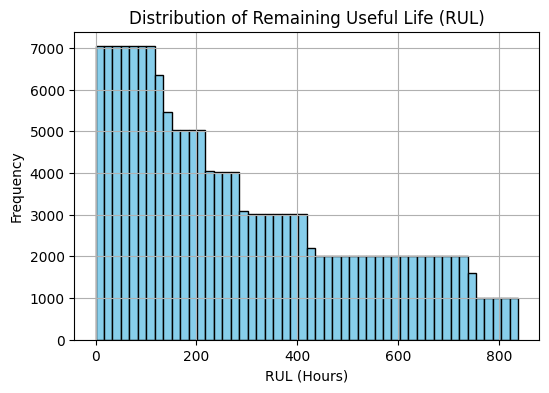

In [11]:
# Distribution of Remaining Useful Life (RUL)
plt.figure(figsize=(6,4))
plt.hist(df['rul'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('RUL (Hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
numerical_df = df.select_dtypes(include=[np.number])
correlations = numerical_df.corr()['rul'].sort_values(ascending=False)
print("\nCorrelation with RUL:")
print(correlations)


Correlation with RUL:
rul          1.000000
sensor_29    0.225014
sensor_37    0.177172
sensor_41    0.143912
sensor_02    0.123011
sensor_18    0.117584
sensor_17    0.113857
sensor_24    0.112879
sensor_01    0.105406
sensor_39    0.103740
sensor_42    0.099217
sensor_14    0.097769
sensor_19    0.096822
sensor_20    0.095200
sensor_16    0.094736
sensor_22    0.094671
sensor_28    0.094640
sensor_21    0.093505
sensor_25    0.088177
sensor_32    0.082229
sensor_33    0.065709
sensor_38    0.064149
sensor_00    0.059091
sensor_26    0.045198
sensor_31    0.043659
sensor_03    0.040416
sensor_10    0.040089
sensor_23    0.039179
sensor_43    0.034813
sensor_46    0.029672
sensor_48    0.028934
sensor_04    0.015732
sensor_49    0.013345
sensor_47   -0.007275
sensor_45   -0.012358
sensor_12   -0.015098
sensor_27   -0.024572
sensor_34   -0.027323
sensor_40   -0.055562
sensor_30   -0.061478
sensor_08   -0.066477
sensor_36   -0.069812
sensor_35   -0.071178
sensor_44   -0.074899
sensor_51

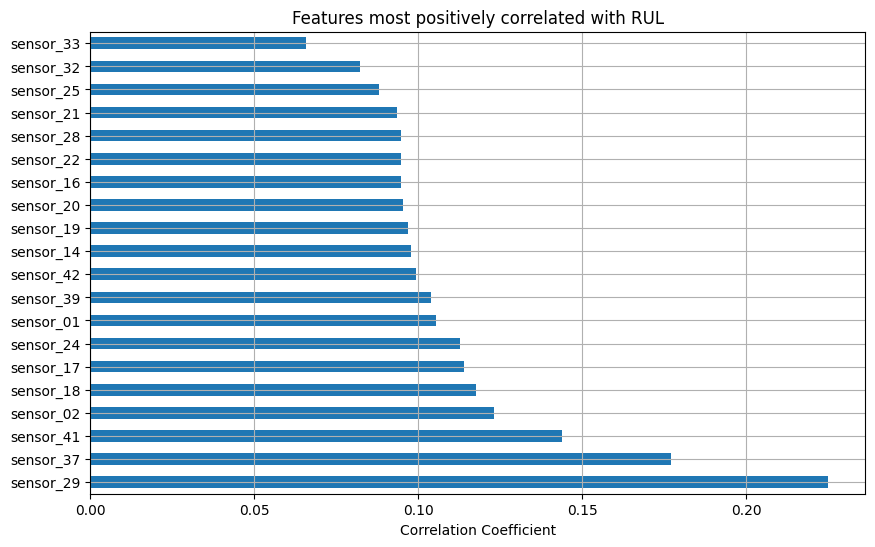

In [13]:
# Plotting the correlation with a bar chart
plt.figure(figsize=(10,6))
correlations[1:21].plot.barh()
plt.title('Features most positively correlated with RUL')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()

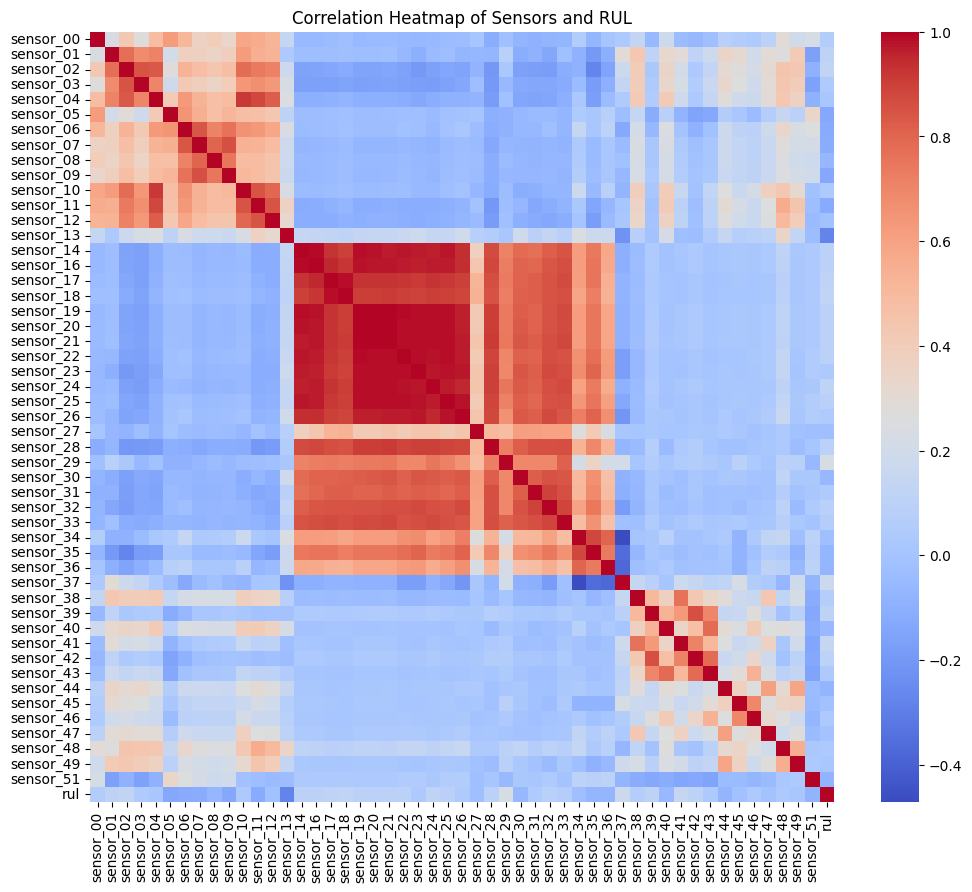

In [14]:
# Plotting a heatmap for the sensor signals’ correlations with each other
plt.figure(figsize=(12,10))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Sensors and RUL')
plt.show()

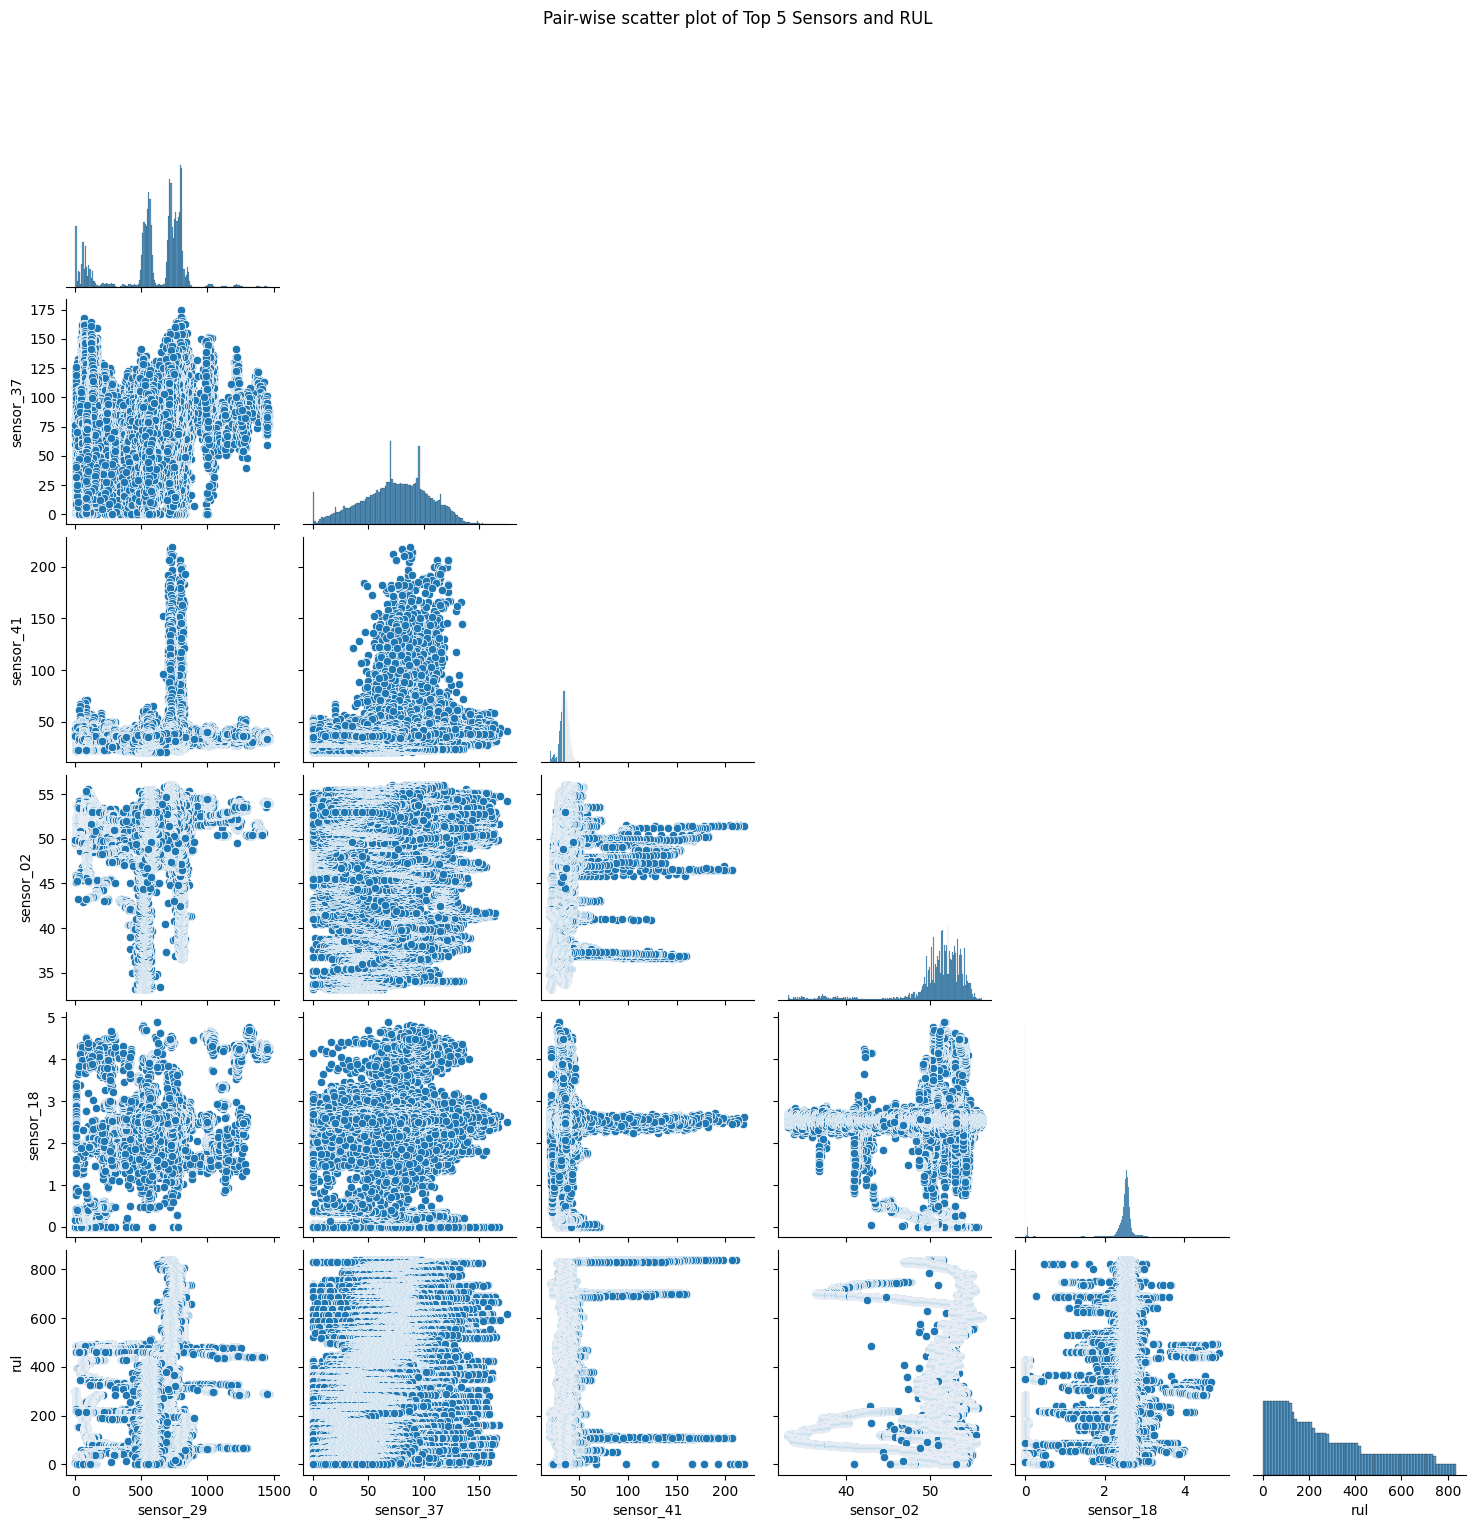

In [15]:
# Top 5 positively correlated sensors with RUL
top5 = correlations[1:6].index.tolist()
# Pairplot to visualize relationships
sns.pairplot(data=df, vars=top5 + ['rul'], corner=True)
plt.suptitle("Pair-wise scatter plot of Top 5 Sensors and RUL", y=1.02)
plt.show()

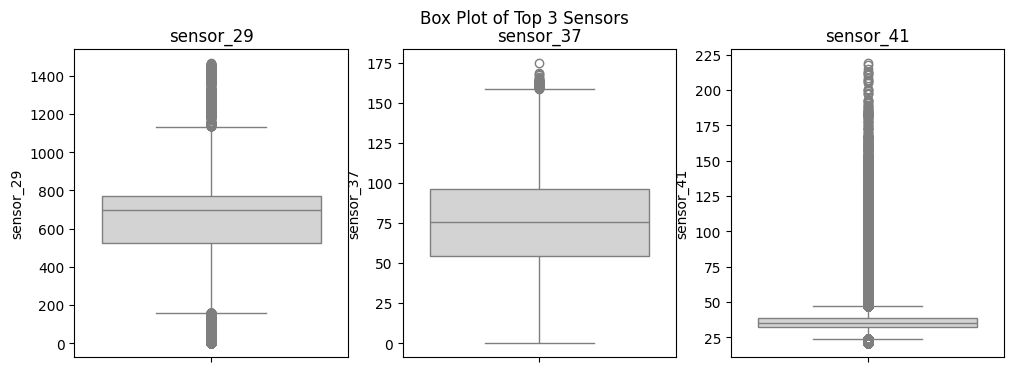

In [16]:
# Box plot for a few sensor signals to detect outliers
sensors_to_plot = ['sensor_29', 'sensor_37', 'sensor_41']

plt.figure(figsize=(12, 4))
for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[sensor], color='lightgrey')
    plt.title(f'{sensor}')

plt.suptitle("Box Plot of Top 3 Sensors")
plt.show()


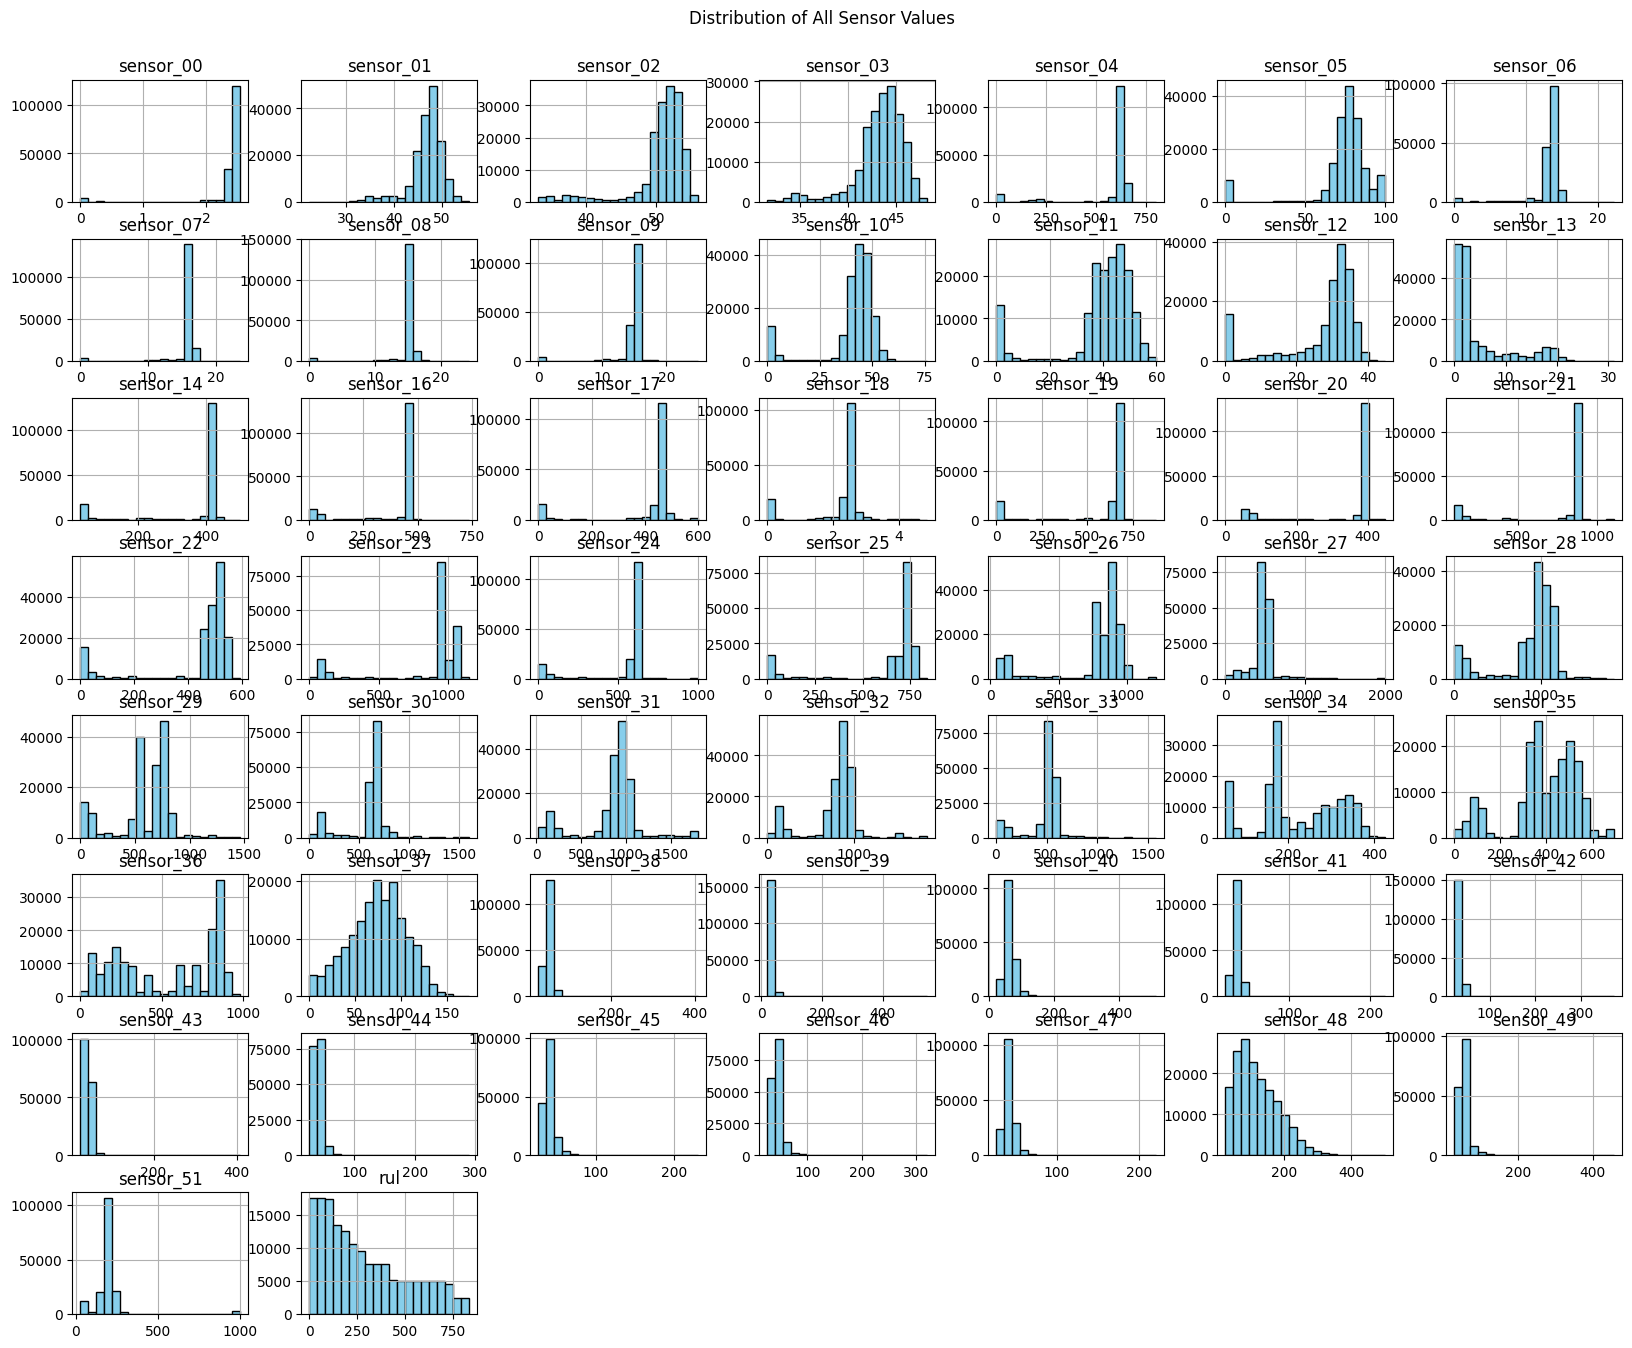

In [17]:
# Histogram of sensor signals
numerical_df = df.select_dtypes(include=[np.number])

numerical_df.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of All Sensor Values")
plt.subplots_adjust(top=0.933)
plt.show()

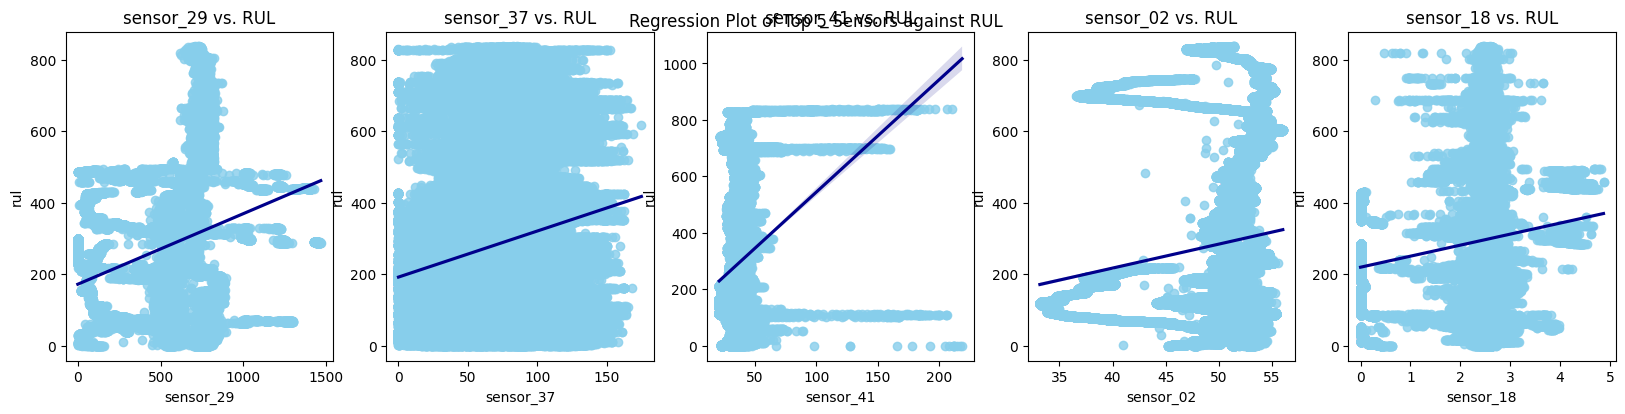

In [18]:
# Top 5 positively correlated sensors with RUL
top5 = correlations[1:6].index.tolist()

# Plot scatter with regression lines
plt.figure(figsize=(20, 4))
for i, sensor in enumerate(top5, 1):
    plt.subplot(1, 5, i)
    sns.regplot(x=sensor, y='rul', data=df, scatter_kws={"color": "skyblue"}, line_kws={"color": "darkblue"})
    plt.title(f'{sensor} vs. RUL')

plt.suptitle("Regression Plot of Top 5 Sensors against RUL")
plt.subplots_adjust(top=0.933)
plt.show()


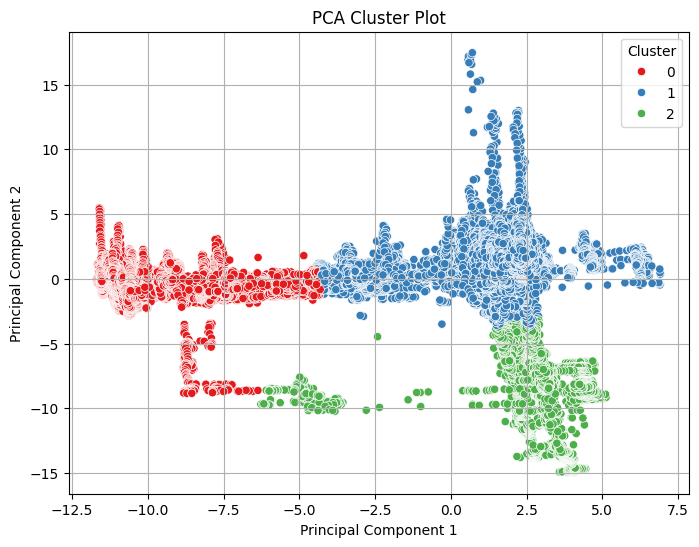

In [19]:
# Cluster Analysis (with K-Means) to identify clusters in sensor data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize numerical data first
scaler = StandardScaler()
numerical_df = df.select_dtypes(include=[np.number])

scalled = scaler.fit_transform(numerical_df)

# Perform K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scalled)
df['cluster'] = clusters

# Plot clusters against two principal components (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scalled)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set1')
plt.title("PCA Cluster Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [20]:
# Split RUL into 3 groups (low, medium, high)
labels = ['low', 'medium', 'high']

df['rul_group'] = pd.qcut(df['rul'], q=3, labels=labels)

# Select only numerical columns for group-wise statistics
numeric_df = df.select_dtypes(include='number')

# Calculate group-wise statistics
group_stats = numeric_df.groupby(df['rul_group']).mean()

print("\nGroup-wise Mean of Sensors:")
print(group_stats)



Group-wise Mean of Sensors:
           sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  \
rul_group                                                                      
low         2.239849  46.810593  50.125821  43.070466  565.197055  73.880753   
medium      2.416503  46.613325  50.174237  43.425424  576.003288  76.879455   
high        2.389357  47.626979  51.585035  43.517329  591.948133  72.038434   

           sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_45  \
rul_group                                              ...              
low        12.949770  15.538653  14.889512  14.689750  ...  41.693494   
medium     13.473993  15.958532  15.235222  14.927212  ...  40.964776   
high       12.868373  15.370336  14.895460  14.362211  ...  40.748116   

           sensor_46  sensor_47   sensor_48  sensor_49   sensor_51  \
rul_group                                                            
low        45.523310  43.928650  118.656674  51.864770  180.8119

C:\Users\navya\AppData\Local\Temp\ipykernel_22568\4244324.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = numeric_df.groupby(df['rul_group']).mean()


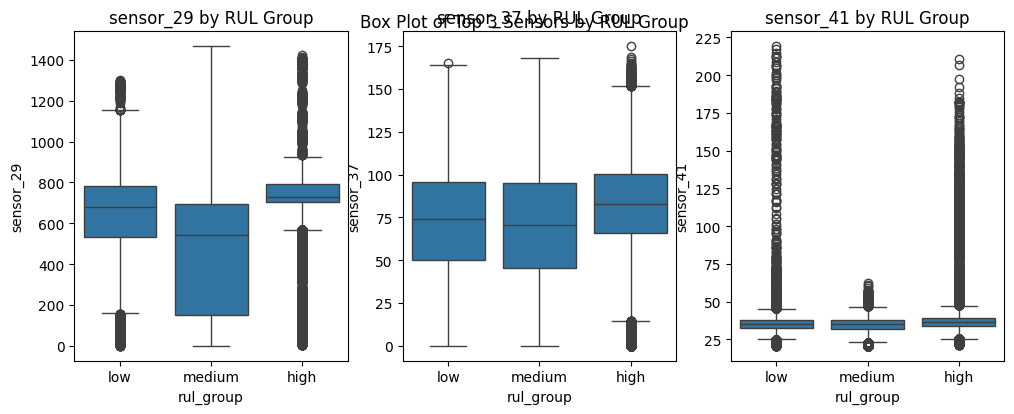

In [21]:
# Box plot for comparison across groups
selected_sensors = ['sensor_29', 'sensor_37', 'sensor_41']

plt.figure(figsize=(12, 4))
for i, sensor in enumerate(selected_sensors, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='rul_group', y=sensor, data=df)
    plt.title(f'{sensor} by RUL Group')

plt.suptitle("Box Plot of Top 3 Sensors by RUL Group")
plt.subplots_adjust(top=0.933)
plt.show()

In [12]:
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [23]:
# Step 1: Prepare data
X = df.select_dtypes(include='number').drop(['rul'], axis=1)
y = df['rul']

# Step 2: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Add Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)

# Step 4: Time-aware Train/Test Split (first 70% for training, last 30% for testing)
train_size = int(0.7 * len(df))
X_train, X_test = X_poly[:train_size], X_poly[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Train Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model1.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"LinearRegression with PolyFeatures → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

LinearRegression with PolyFeatures → MAE: 0.0000, RMSE: 0.0000, R²: 1.0000


In [39]:
#from sklearn.linear_model import Ridge
#train_size = int(0.7 * len(df))
#X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
#y_train, y_test = y[:train_size], y[train_size:]

#model2 = Ridge(alpha=1.0)
#model2.fit(X_train, y_train)

#y_pred = model2.predict(X_test)
#mae = mean_absolute_error(y_test, y_pred)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#r2 = r2_score(y_test, y_pred)

#print(f"Ridge Regression → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Ridge Regression → MAE: 63.8400, RMSE: 82.4257, R²: 0.4430


In [40]:
from sklearn.linear_model import RidgeCV

model2 = RidgeCV(alphas=[0.1, 1, 10], cv=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RidgeCV → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

RidgeCV → MAE: 10.7955, RMSE: 13.9384, R²: 0.9841


In [43]:
from sklearn.linear_model import LassoCV

##model3 = LassoCV(alphas=[0.1, 1, 10], cv=5)
#model3.fit(X_train, y_train)
#y_pred = model3.predict(X_test)

#mae = mean_absolute_error(y_test, y_pred)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#r2 = r2_score(y_test, y_pred)

#print(f"LassoCV → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

In [46]:
# Step 1: Keep only numeric features
numeric_df = df.select_dtypes(include='number')

# Step 2: Correlation-based feature selection
corr = numeric_df.corr()['rul']
top_features = corr[corr.abs() > 0.1].index.tolist()
top_features.remove('rul')

X = numeric_df[top_features]
y = numeric_df['rul']

# Step 3: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Step 5: LassoCV with better convergence
alphas = np.logspace(-4, 1, 50)
model3 = LassoCV(alphas=alphas, cv=5, max_iter=100000)
model3.fit(X_train, y_train)

# Step 6: Evaluation
y_pred = model3.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"LassoCV → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

LassoCV → MAE: 162.3900, RMSE: 198.8181, R²: 0.2242


In [47]:
param_grid = {"max_depth": [5, 10, 20]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

model4 = grid.best_estimator_
y_pred = model4.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"DecisionTree → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

DecisionTree → MAE: 7.1376, RMSE: 47.9890, R²: 0.9548


In [48]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20]
}
grid = GridSearchCV(RandomForestRegressor(n_jobs=-1), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

model5 = grid.best_estimator_
y_pred = model5.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"DecisionTree → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

DecisionTree → MAE: 7.2145, RMSE: 31.0880, R²: 0.9810


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.1]
}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

model6 = grid.best_estimator_
y_pred = model6.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"GradientBoostingRegressor → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

GradientBoostingRegressor → MAE: 39.4149, RMSE: 68.9372, R²: 0.9067


In [25]:
from xgboost import XGBRegressor
# Step 1: Keep only numeric features
numeric_df = df.select_dtypes(include='number')

# Step 2: Correlation-based feature selection
corr = numeric_df.corr()['rul']
top_features = corr[corr.abs() > 0.1].index.tolist()
top_features.remove('rul')

X = numeric_df[top_features]
y = numeric_df['rul']

# Step 3: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.1]
}
grid = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

model7 = grid.best_estimator_
y_pred = model7.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBRegressor → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

XGBRegressor → MAE: 39.5993, RMSE: 68.8498, R²: 0.9070


In [26]:
import lightgbm as lgb

param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 10, 15],
    "learning_rate": [0.05, 0.1, 0.2]
}
grid = GridSearchCV(lgb.LGBMRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

model = grid.best_estimator_
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"lightgbm → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3625
[LightGBM] [Info] Number of data points in the train set: 93206, number of used features: 15
[LightGBM] [Info] Start training from score 289.394303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Correlation filtering
corr = df_numeric.corr()['rul']
top_features = corr[corr.abs() > 0.1].index.tolist()
top_features.remove('rul')  # Remove target from features

# Features and target
X = df_numeric[top_features]
y = df_numeric['rul']

# Standardize (important for MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Define and train MLP
mlp = MLPRegressor(hidden_layer_sizes=(100, 50),  # two layers
                   activation='relu',
                   solver='adam',
                   learning_rate='adaptive',
                   max_iter=500,
                   random_state=42)

mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MLP → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP → MAE: 30.2004, RMSE: 48.4576, R²: 0.9539


In [50]:
# Step 1: Keep only numeric features
numeric_df = df.select_dtypes(include='number')

# Step 2: Correlation-based feature selection
corr = numeric_df.corr()['rul']
top_features = corr[corr.abs() > 0.1].index.tolist()
top_features.remove('rul')

X = numeric_df[top_features]
y = numeric_df['rul']

# Step 3: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [51]:
# Step 5: Random Forest with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid,
                    scoring='neg_mean_absolute_error',
                    cv=5,
                    n_jobs=-1,
                    verbose=1)

grid.fit(X_train, y_train)

# Step 6: Evaluate best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print(f"RandomForest → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForest → MAE: 10.3135, RMSE: 27.7187, R²: 0.9849


In [53]:
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearch with DecisionTreeRegressor
grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                    param_grid,
                    scoring='neg_mean_absolute_error',
                    cv=5,
                    n_jobs=-1,
                    verbose=1)

# Fit model
grid.fit(X_train, y_train)

# Evaluate the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Best Parameters:", grid.best_params_)
print(f" DecisionTree → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
 Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
 DecisionTree → MAE: 5.2089, RMSE: 46.2730, R²: 0.9580


In [26]:
numeric_df = df.select_dtypes(include='number')

# Step 2: Correlation-based feature selection
corr = numeric_df.corr()['rul']
top_features = corr[corr.abs() > 0.1].index.tolist()
top_features.remove('rul')
#  Skip StandardScaler (not required for tree-based models)
X = numeric_df[top_features].values
y = numeric_df['rul'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Hyperparameter space for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2.0]   # L2 regularization
}

# RandomizedSearchCV for performance
search = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=50,  # Try 50 random combinations
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

# Evaluate best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", search.best_params_)
print(f"XGBRegressor → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBRegressor → MAE: 19.2149, RMSE: 37.2761, R²: 0.9727


In [27]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, -1],  # -1 = no limit
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],  # L1
    'reg_lambda': [0, 0.1, 0.5]  # L2
}

# Use RandomizedSearch to keep it efficient
search = RandomizedSearchCV(
    lgb.LGBMRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # 50 trials
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

# Evaluate best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", search.best_params_)
print(f"LightGBM → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 116508, number of used features: 15
[LightGBM] [Info] Start training from score 289.300345
Best Parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 30, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
LightGBM → MAE: 17.0934, RMSE: 33.2039, R²: 0.9784


In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Feature selection
df_numeric = df.select_dtypes(include='number')
corr = df_numeric.corr()['rul']
top_features = corr[corr.abs() > 0.1].index.tolist()
top_features.remove('rul')

X = df_numeric[top_features]
y = df_numeric['rul']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Hyperparameter space for tuning
param_dist = {
    'hidden_layer_sizes': [(100,), (100, 50), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['adaptive', 'constant'],
    'learning_rate_init': [0.001, 0.005, 0.01],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'early_stopping': [True]
}

# Use RandomizedSearchCV to explore the space
search = RandomizedSearchCV(
    MLPRegressor(max_iter=1000, random_state=42),
    param_distributions=param_dist,
    scoring='neg_mean_absolute_error',
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

# Evaluate
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Best Parameters:", search.best_params_)
print(f" MLP → MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (128, 64, 32), 'early_stopping': True, 'alpha': 0.0001, 'activation': 'tanh'}
 MLP → MAE: 15.6309, RMSE: 28.6983, R²: 0.9838
